# **Punto 3.**

Se analiza el conjunto de datos “California Housing Dataset” del paquete sklearn. La variable objetivo de este conjunto de datos, es el valor medio de la vivienda para los distritos de California, expresado en cientos de miles de dólares.


*  Este conjunto de datos se derivó del censo de EE.UU. de 1990, usando como unidad de censo el grupo de bloques. Un grupo de bloques es la unidad geográfica más pequeña para la que La Oficina del Censo de EE.UU. publica datos de muestra (un grupo de bloque generalmente tiene una población de 600 a 3000 personas).
*   Un hogar es un grupo de personas que residen dentro de una casa. Dado que el promedio del número de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como centros vacacionales.




## 3.1 Lectura y descripción general del dataset

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

#cargue del data set
california_housing = fetch_california_housing(as_frame=True)

In [108]:
# Imprimir la descripción general del dataset
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

El conjunto de datos de California Housing consiste en datos recopilados del censo de EE. UU. de 1990, donde cada fila representa un grupo de bloques censales en California. Este conjunto de datos contiene 8 atributos numéricos predictivos junto con la variable objetivo, que es el valor medio de las viviendas en miles de dólares. Los atributos incluyen ingreso medio, edad mediana de la vivienda, número medio de habitaciones y dormitorios por hogar, población del grupo de bloques, ocupación media de los hogares, latitud y longitud del grupo de bloques. No hay valores faltantes en este conjunto de datos

## 3.2 Separación Variables explicativas y variables respuestas. Análisis de inclusión de variables "Longitud" y "Latitud" como variables del Modelo

In [124]:
# Extracting the features (X) and target variable (y)
X = california_housing.data
y = california_housing.target

df3 = pd.DataFrame(california_housing.frame) #Se crea un dataframe df3, con el dataset completo
df3.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue']
df3.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Análisis exploratorio de datos**

El dataset involucra 8 variables explicativas más una columna de valores objetivo. Todas las variables son de tipo numérico. Se cuenta con 20.640 registros, en ninguna variable se evidencias registros nulos.

A continuación, se lleva a cabo una revisión exploratoria del conjunto de datos, donde se visualizan los principales estadísticos de cada variable, se emplean histogramas y diagramas de cajas para visualizar el comportamiento de la distribución de cada una de ellas y la detección de valores atípicos. Posteriormente, se procede a validar las correlaciones entre las variables. Más adelante, se destacan los hallazgos más relevantes de esta revisión.

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedHouseValue  20640 non-null  float64
 1   MedInc         20640 non-null  float64
 2   HouseAge       20640 non-null  float64
 3   AveRooms       20640 non-null  float64
 4   AveBedrms      20640 non-null  float64
 5   Population     20640 non-null  float64
 6   AveOccup       20640 non-null  float64
 7   Latitude       20640 non-null  float64
 8   Longitude      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [51]:
df3.describe()

,MedHouseValue,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.153956,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.149990,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,1.196000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,1.797000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,2.647250,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,5.000010,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


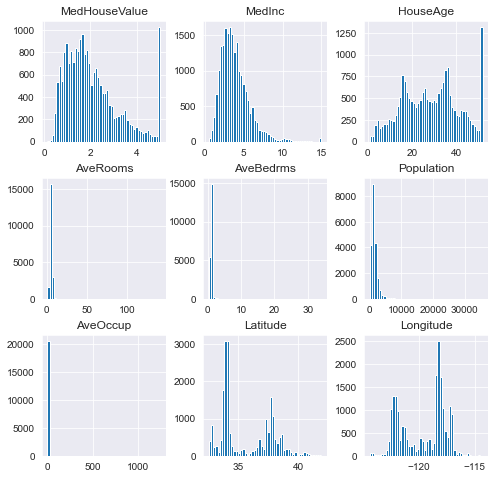

In [18]:
df3.hist(bins = 50,figsize=(8, 8))
plt.show()

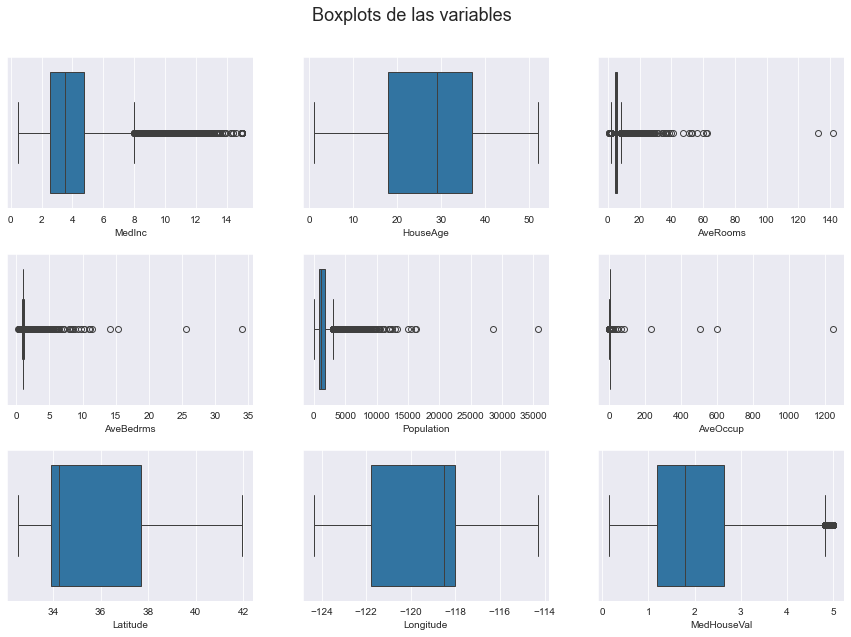

In [20]:
#Enunciamos las columnas
columns = california_housing.frame.columns

#Creamos la grilla de graficación
fig, axes = plt.subplots(nrows=3, ncols= 3, figsize=(15, 10)) 
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Boxplots de las variables", fontsize=18, y=0.95)

for column, ax in zip(columns, axes.ravel()): 
    sns.boxplot(x=column, data=california_housing.frame, ax=ax)#loop que itera sobre cada casilla de la grilla y coloca un gráfico en cada posición
    sns.set_style('darkgrid')
plt.show()

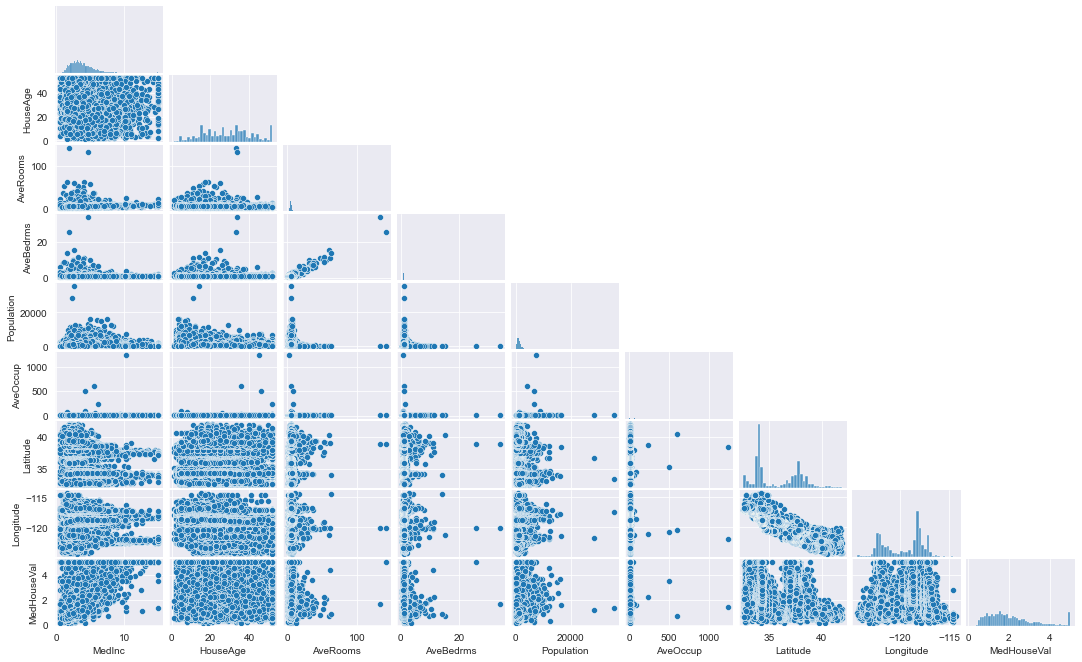

In [21]:
#Construimos la scatter matrix de las variables del dataset
sns.pairplot(data=california_housing.frame, corner = True)
plt.gcf().set_size_inches(15,9)

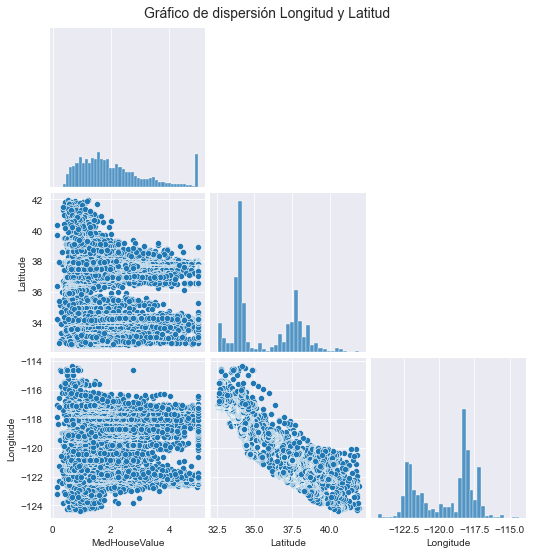

In [97]:
subset_df = df3[["MedHouseValue","Latitude", "Longitude"]]

# Crear el gráfico de dispersión
scatter_matrix = sns.pairplot(data=subset_df, corner = True)

plt.suptitle("Gráfico de dispersión Longitud y Latitud", y=1.02, fontsize=14) # Agregar un título al gráfico
plt.show()

Al graficar la dispersión entre las variables, es dificil evidenciar visualmente algún tipo de correlación fuerte entre los atributos y el valor medio de una casa; el ingreso medio parece tener una correlación positiva con esta variable dependiente. Sin embargo, se evidencia la presencia de valores atípicos que dificultan el análisis gráfico, además de atributos correlacionados entre ellos:

- Longitud y Latitud están correlacionados negativamente - a mayor latitud, menor longitud - que corresponde a la naturaleza de la variable como coordenadas de ubicación geográfica; se cuestiona el valor predicitivo de ambas variables al no mostrar correlación aparente con la variable dependiente, pero se debe hacer el cálculo de las correlaciones;
- Por lo demás, el promedio de camas parece estar correlacionado positivamente con el número de habitaciones, lo cual es lo esperado según la intución: más habitaciones, más camas.

Análisis correlación de variables

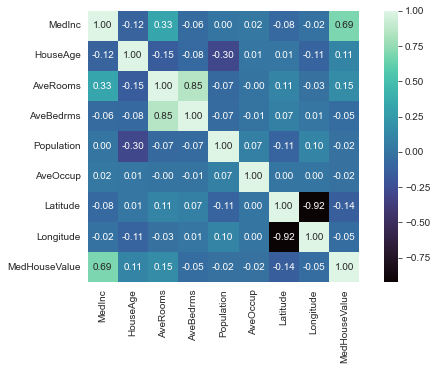

In [98]:
corrmat = df3.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df3.columns,
                 xticklabels=df3.columns,
                 cmap="mako")
plt.gcf().set_size_inches(9,5)
plt.show()


Con base en los coeficientes de correlación obtenidos y reflejados en el mapa de calor de correlaciones, se resalta:

* Las variables "MedHouseValue" (valor medio de la vivienda) y "MedInc" (ingreso medio), sugiriendo una correlación positiva fuerte de 0.688. Esto sugiere que hay una relación positiva entre el valor medio de la vivienda y el ingreso medio.

* No hay una correlación significativa entre "HouseAge" (edad media de la vivienda) y otras variables. Sin embargo, hay una leve correlación negativa con "Population" (población) de -0.296, lo que sugiere que las áreas con viviendas más antiguas tienden a tener una población ligeramente menor.

* Las variables relacionadas con el tamaño y la distribución de las habitaciones ("AveRooms" y "AveBedrms") tienen una correlación moderada a fuerte entre sí (0.848), lo que es comprensible ya que el número de habitaciones está relacionado con el número de dormitorios en una vivienda.

* La latitud y la longitud ("Latitude" y "Longitude"): el valor medio de la vivienda tiene una bajísima dependencia lineal negativa con la coordenada de Longitud y es débil para el caso de la Latitud. Esto tiene sentido, dado que estas variables son coordenadas de ubicación cartograficas y que tienden ser mediciones a escala global, que parece tener poca influencia a nivel local en un espacio geográfico limitado como lo es el de California. Además, ambas representan un problema de multicolinealidad para el modelo, al tener una alta correlación negativa. Se propone descartar ambas variables para la construcción del modelo.

In [125]:
df3 = df3.drop(["Latitude",	"Longitude"], axis=1)
X= X.drop(["Latitude",	"Longitude"], axis=1)

X.info() # informacion del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
dtypes: float64(6)
memory usage: 967.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   MedHouseValue  20640 non-null  float64
dtypes: float64(7)

## 3.3 Ajuste al Modelo de regresión Lasso

**OLS PREVIO AL AJUSTE LASSO**

In [122]:
#OLS con variables reducidas
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4032.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        22:21:37   Log-Likelihood:                -24235.
No. Observations:               20640   AIC:                         4.848e+04
Df Residuals:                   20633   BIC:                         4.854e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4391      0.028    -15.918      0.0

## 3.3  Ajuste de modelo de regresión Lasso; calculo de coeficiente de penalización alpha

In [132]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test= train_test_split(df3.iloc[:, :6], df3.iloc[:, 6], test_size=0.33, random_state=42)
print("X", X.shape)
print("X_test shape ", X_test.shape)

X (13828, 6)
X_test shape  (6812, 6)


Después de varias iteraciones, se determina que el valor óptimo para alpha es un número menor que 1, e incluso puede ser cercano a cero. Se establece un rango de búsqueda para alpha desde 0.01 hasta 1, con incrementos de 0.01.

In [114]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np

model = Lasso() # Definir el modelo Lasso

# Definir la estrategia de validación cruzada con RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3)  # Dividir los datos en 10 particiones con 3 repeticiones

# Definir la cuadrícula de hiperparámetros para la búsqueda
grid = dict()
grid["alpha"] = np.arange(0.01, 1, 0.01)  # Definir un rango de valores para el parámetro alpha

# Configurar la búsqueda en cuadrícula con GridSearchCV
search = GridSearchCV(model, grid, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1)

# Ejecutar la búsqueda en cuadrícula en los datos de entrenamiento
results = search.fit(X, y)

# Imprimir el mejor puntaje y los mejores parámetros encontrados
print(results.best_score_)
print(results.best_params_, ". Mejores parametros")


-0.6509077250977102
{'alpha': 0.01} . Mejores parametros


Considerando un coeficiente de penalización de 0.01, se elimina la variable "Population". Desde el ajuste del modelo OSL considerando todas las variables, se lograba evidenciar que el efecto de esta variable, es bastante pequeño en comparación con otras variables del modelo,  lo que significa que el impacto directo de la población en el valor medio de la vivienda es bastante bajo.

In [135]:
Model = Lasso(alpha=0.01) # Definir el modelo Lasso con alpha=0.01
Model.fit(X, y)# Ajustar el modelo a los datos

column_names = list(X)

# Crear un DataFrame para almacenar los coeficientes (betas) del modelo
df_betas = pd.DataFrame(np.column_stack((column_names, np.round(Model.coef_, decimals=4))))

# Renombrar la primera columna como 'Variable'
df_betas = df_betas.rename(columns={0: 'Variable'})

# Renombrar la segunda columna como 'Betas'
df_betas = df_betas.rename(columns={1: 'Betas'})

# Imprimir el DataFrame con los coeficientes del modelo
print(df_betas)

     Variable    Betas
0      MedInc   0.4994
1    HouseAge    0.017
2    AveRooms  -0.1431
3   AveBedrms    0.686
4  Population      0.0
5    AveOccup  -0.0042


In [136]:
#OLS con variables reducidas
X = sm.add_constant(X)
X = pd.DataFrame(X)
X = X.drop(["Population"], axis=1)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MedHouseValue   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     3264.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        22:33:37   Log-Likelihood:                -16207.
No. Observations:               13828   AIC:                         3.243e+04
Df Residuals:                   13822   BIC:                         3.247e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4833      0.032    -15.328      0.0

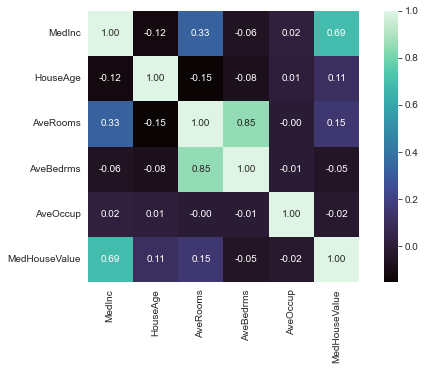

In [137]:
df_corr = df3.drop(["Population"], axis=1)
corrmat = df_corr.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df_corr.columns,
                 xticklabels=df_corr.columns,
                 cmap="mako")
plt.gcf().set_size_inches(9,5)
plt.show()

Habiendo eliminado del modelo la variable "Population", respecto al ajuste del modelo OLS,  se evidencia que,  los valores de R-cuadrado y R-cuadrado ajustado son similares en ambos modelos (alrededor de 0.540 vs 0.541); sin embargo,  el modelo sin la variable "Population" tiene un F-estadístico ligeramente más alto que el modelo inicial, pareciendo indicar un mejor ajuste del modelo.

Se sigue buscando iterativamente, utilizando una metodología manual, un coeficiente de penalización que permita eliminar una de las variables "AveRooms" y "AveBedrms" del modelo, debido a la alta correlación entre ellas.



In [138]:
Model = Lasso(alpha=0.02) # Definir el modelo Lasso con alpha=0.01
Model.fit(X, y)# Ajustar el modelo a los datos

column_names = list(X)

# Crear un DataFrame para almacenar los coeficientes (betas) del modelo
df_betas = pd.DataFrame(np.column_stack((column_names, np.round(Model.coef_, decimals=4))))

# Renombrar la primera columna como 'Variable'
df_betas = df_betas.rename(columns={0: 'Variable'})

# Renombrar la segunda columna como 'Betas'
df_betas = df_betas.rename(columns={1: 'Betas'})

# Imprimir el DataFrame con los coeficientes del modelo
print(df_betas)

    Variable    Betas
0      const      0.0
1     MedInc   0.4586
2   HouseAge   0.0165
3   AveRooms  -0.0692
4  AveBedrms   0.2738
5   AveOccup  -0.0038


Considerando un coeficiente de penalización de 0.03, se elimina la variable "AveBedrms"

In [139]:
Model = Lasso(alpha=0.03) # Definir el modelo Lasso con alpha=0.01
Model.fit(X, y)# Ajustar el modelo a los datos

column_names = list(X)

# Crear un DataFrame para almacenar los coeficientes (betas) del modelo
df_betas = pd.DataFrame(np.column_stack((column_names, np.round(Model.coef_, decimals=4))))

# Renombrar la primera columna como 'Variable'
df_betas = df_betas.rename(columns={0: 'Variable'})

# Renombrar la segunda columna como 'Betas'
df_betas = df_betas.rename(columns={1: 'Betas'})

# Imprimir el DataFrame con los coeficientes del modelo
print(df_betas)

    Variable    Betas
0      const      0.0
1     MedInc   0.4301
2   HouseAge   0.0166
3   AveRooms  -0.0182
4  AveBedrms      0.0
5   AveOccup  -0.0036


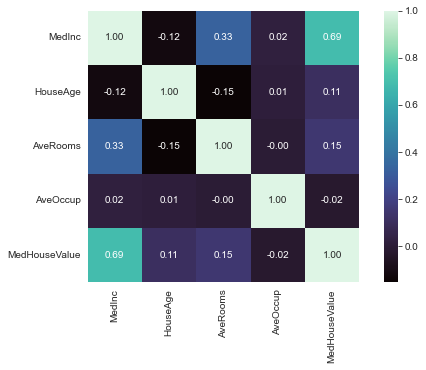

In [140]:
df_corr = df3.drop(["Population","AveBedrms"], axis=1)
corrmat = df_corr.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df_corr.columns,
                 xticklabels=df_corr.columns,
                 cmap="mako")
plt.gcf().set_size_inches(9,5)
plt.show()

In [141]:
#OLS con variables reducidas
X = sm.add_constant(X)
X = pd.DataFrame(X)
X = X.drop(["AveBedrms"], axis=1)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MedHouseValue   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     3647.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        22:35:21   Log-Likelihood:                -16617.
No. Observations:               13828   AIC:                         3.324e+04
Df Residuals:                   13823   BIC:                         3.328e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0285      0.027      1.060      0.2

Comparativamente, el Modelo OLS calculado previo al ajuste por Lasso, tiene un R-cuadrado ajustado ligeramente mayor (0.541) en comparación con el Modelo OLS calculado posterior al ajuste por Lasso (0.513), lo que sugiere que el Modelo sin ajuste Lasso explica una fracción mayor de la variabilidad en la variable dependiente. Sin embargo, el Modelo posterior al ajuste Lasso, tiene un menor número de variables predictoras (4 en comparación con 6 del Modelo 1) y un menor valor AIC (Criterio de Información de Akaike), lo que indica una mejor bondad de ajuste y una mayor simplicidad en el Modelo .

In [142]:
# Calcular los residuos
residuals = results.resid

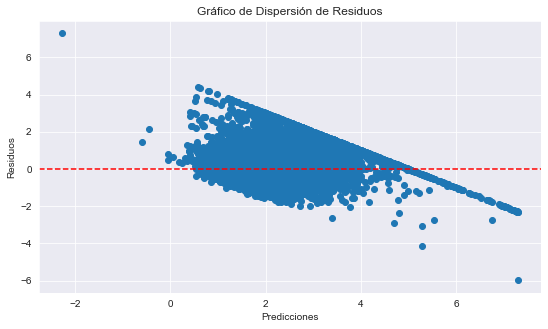

In [143]:
predictions = results.predict(X)

plt.scatter(predictions, residuals)
plt.title('Gráfico de Dispersión de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.gcf().set_size_inches(9,5)
plt.show()

De acuerdo con el gráfico anterior, se encuentra que los residuos, no muestran un comportamiento constante al rededor del cero.

A continuación se proceder a evaluar mediante tests de Breusch-Pagan y Durbin-Watson, si el comportamiento de los residuos presentan o no, heterocedasticidad y autocorrelación

In [144]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Calcula el test de Breusch-Pagan
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X)

# Imprime los resultados
print("LM Estadístico:", lm)
print("P-valor LM:", lm_p_value)
print("F Estadístico:", fvalue)
print("P-valor F:", f_p_value)

LM Estadístico: 523.4916138930931
P-valor LM: 5.556178323713086e-112
F Estadístico: 135.97316730621492
P-valor F: 3.792382805732068e-114


*LM Estadístico: El valor obtenido LM para el Test de Breusch-Pagan el valor es 523.4916, sugiriendo una fuerte evidencia en contra de la homocedasticidad.

P-valor LM: indica que hay suficiente evidencia para rechazar la hipótesis nula de homocedasticidad. Aquí, el p-valor es 3.792382805738104e-114, que es extremadamente pequeño, lo que sugiere una fuerte evidencia en contra de la homocedasticidad.

Los resultados indican que hay evidencia significativa en contra de la hipótesis nula de homocedasticidad, lo que sugiere que los residuos del modelo no tienen una varianza constante y que existe heterocedasticidad.

Supuesto 2: Los 𝓔ᵢ presentan una distribución Normal

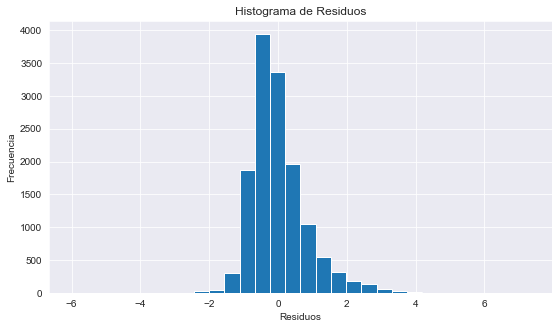

In [145]:
plt.hist(residuals, bins=30)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.gcf().set_size_inches(9,5)
plt.show()

In [146]:
#Test de Shapiro-Wilk para validación de Normalidad en los residuales

from scipy import stats

shapiro_result = stats.shapiro(residuals)

# Imprimir el resultado del test
print("Estadístico de Shapiro-Wilk:", shapiro_result.statistic)
print("P-valor:", shapiro_result.pvalue)

# Interpretar el resultado del test
alpha = 0.05
if shapiro_result.pvalue > alpha:
    print("No se puede rechazar la hipótesis nula. Los residuos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

Estadístico de Shapiro-Wilk: 0.9250346800254036
P-valor: 3.582313021664891e-63
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.


C:\Users\User\AppData\Local\Temp\ipykernel_26140\1064670434.py:5: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13828.
  shapiro_result = stats.shapiro(residuals)


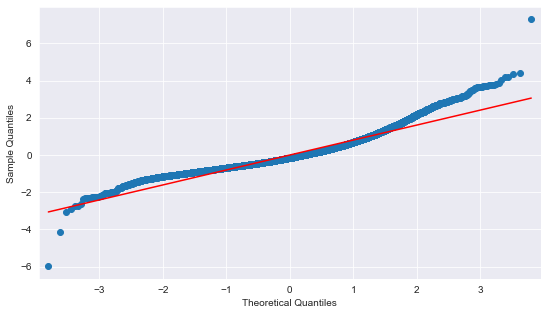

In [147]:
#import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

#  gráfico QQPlot
fig = smg.qqplot(residuals, line='s')

# Mostrar el gráfico
plt.gcf().set_size_inches(9,5)
plt.show()

## 3.5 Detección de atípicos usando la distancia de Mahalanobis

Considere:

$$ D(x) = √((x - μ)ᵀ S⁻¹ (x - μ))$$

Declaramos de nuevo las variables para contener todos los elementos, sin considerar las columnas descartadas por el proceso LASSO. 

In [154]:
# Extracting the features (X) and target variable (y)
X = california_housing.data
X = X.drop(["Population","AveBedrms","Latitude","Longitude"], axis= 1)
y = california_housing.target
X.describe()

,MedInc,HouseAge,AveRooms,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,3.070655
std,1.899822,12.585558,2.474173,10.386050
min,0.499900,1.000000,0.846154,0.692308
25%,2.563400,18.000000,4.440716,2.429741
50%,3.534800,29.000000,5.229129,2.818116
75%,4.743250,37.000000,6.052381,3.282261
max,15.000100,52.000000,141.909091,1243.333333


In [158]:
from scipy.stats import chi2
alpha = 0.05
center = X - X.mean()
Sigma = X.cov()

left = np.matmul(center, np.linalg.inv(Sigma)) ## Elemento de la izquierda en la multiplicación
d2 = np.matmul(left.values, center.transpose()) ### Distancia de mahalanobis al cuadrado
d2 = np.sqrt(np.diag(d2)) ### Importante es la raiz cuadrada la que se compara con el cutoff

cutt_off = chi2.ppf(q = 1 - alpha, df = X.shape[1])
print(f"Numero de individuos cortados de la muesta {sum(d2 > cutt_off)}")
X_reduce = X.iloc[d2 <= cutt_off, :]
y_reduce = y[X.index.isin(X_reduce.index)]

Numero de individuos cortados de la muesta 37


**Ajuste Modelo OLS**

In [160]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test= train_test_split(X_reduce, y_reduce, test_size=0.33, random_state=42)
print("X", X.shape)
print("X_test shape ", X_test.shape)

X (13804, 4)
X_test shape  (6799, 4)


In [161]:
#OLS con variables reducidas
import statsmodels.api as sm
X_reduce = sm.add_constant(X_reduce)
X_reduce = pd.DataFrame(X_reduce)
model = sm.OLS(y_reduce, X_reduce)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6108.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        22:45:28   Log-Likelihood:                -24129.
No. Observations:               20603   AIC:                         4.827e+04
Df Residuals:                   20598   BIC:                         4.831e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7185      0.029     24.827      0.0

In [162]:
# Calcular los residuos
residuals = results.resid

**Validación supuestos del modelo**

Supuesto 1 y supuesto 3 y 4: Los residuales son independientes, Promedio de los 𝓔ᵢ= 0 y presentan varianza constante

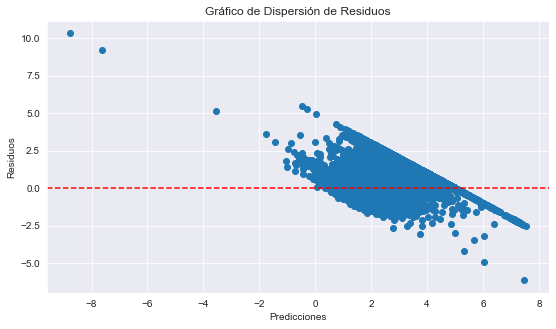

In [163]:
predictions = results.predict(X_reduce)

plt.scatter(predictions, residuals)
plt.title('Gráfico de Dispersión de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.gcf().set_size_inches(9,5)
plt.show()

De acuerdo con el gráfico anterior, se encuentra que los residuos, no muestran un comportamiento constante al rededor del cero.

A continuación se proceder a evaluar mediante tests de Breusch-Pagan y Durbin-Watson, si el comportamiento de los residuos presentan o no, heterocedasticidad y autocorrelación

In [164]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Calcula el test de Breusch-Pagan
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X_reduce)

# Imprime los resultados
print("LM Estadístico:", lm)
print("P-valor LM:", lm_p_value)
print("F Estadístico:", fvalue)
print("P-valor F:", f_p_value)

LM Estadístico: 2578.9660219679995
P-valor LM: 0.0
F Estadístico: 736.8153847418713
P-valor F: 0.0


In [165]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

residuos = results.resid

# Calcular el estadístico de Durbin-Watson
statistic = durbin_watson(residuos)

# Imprimir el resultado
print("Estadístico de Durbin-Watson:", statistic)

Estadístico de Durbin-Watson: 0.897428425946945


La prueba Durbin-Watson sobre los datos nos sugiere que existe autocorrelación de los residuos. 

Supuesto 2: Los 𝓔ᵢ presentan una distribución Normal

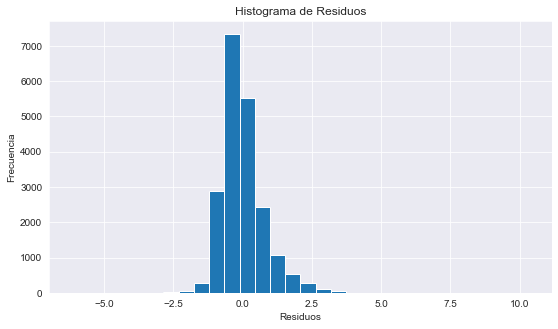

In [167]:
plt.hist(residuals, bins=30)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.gcf().set_size_inches(9,5)
plt.show()

In [168]:
#Test de Shapiro-Wilk para validación de Normalidad en los residuales

from scipy import stats

shapiro_result = stats.shapiro(residuals)

# Imprimir el resultado del test
print("Estadístico de Shapiro-Wilk:", shapiro_result.statistic)
print("P-valor:", shapiro_result.pvalue)

# Interpretar el resultado del test
alpha = 0.05
if shapiro_result.pvalue > alpha:
    print("No se puede rechazar la hipótesis nula. Los residuos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

Estadístico de Shapiro-Wilk: 0.9232891496838485
P-valor: 1.107328742507968e-71
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.


C:\Users\User\AppData\Local\Temp\ipykernel_26140\1064670434.py:5: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20603.
  shapiro_result = stats.shapiro(residuals)


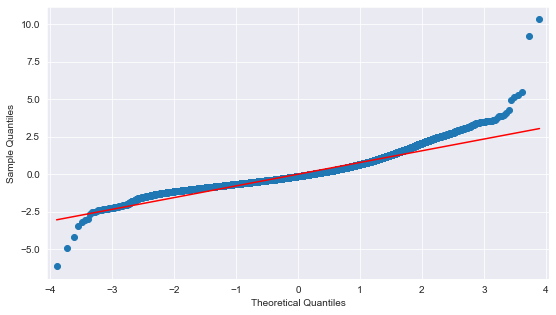

In [169]:
#import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

#  gráfico QQPlot
fig = smg.qqplot(residuals, line='s')

# Mostrar el gráfico
plt.gcf().set_size_inches(9,5)
plt.show()

Al graficar los residuos, no nos da información aparente para descartar la normalidad de los residuos. Además, el p-valor de la prueba Jarque Bera es menor a 0.05, lo que nos da información suficiente para rechazar la hipótesis nula y descartar la distribución normal de los residuos.